In [1]:
import numpy as np
import scipy as sp
from scipy.signal import fftconvolve
from scipy import fftpack
from scipy.io import wavfile 
from scipy.misc import imread
from matplotlib import pyplot as plt
%matplotlib inline
import pywt

/Users/matheson/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


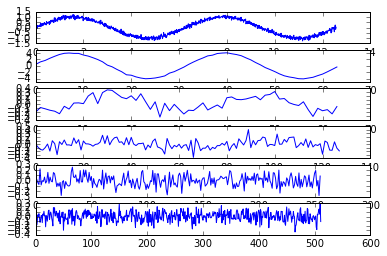

In [2]:
#Problem 1
def dwt(X, L, H, n):
    
    A_i = X
    
    D = []
    for i in xrange(n):
        D_iplus1 = fftconvolve(A_i, H)[1::2]
                                    # []
        D.append(D_iplus1)
        A_n = fftconvolve(A_i, L)[1::2]
        A_i = A_n
        
    D.append(A_n)
    return D[::-1]

#fftconvolve(X, L)

#testing
L = np.ones(2)/np.sqrt(2)
H = np.array([-1,1])/np.sqrt(2)
X = np.sin(np.linspace(0,2*np.pi, 16))
domain = np.linspace(0,4*np.pi, 1024)
noise = np.random.randn(1024)*.1
noisysin = np.sin(domain) + noise
coeffs = dwt(noisysin, L, H, 4)
#plot

plt.subplot(611)
plt.plot(domain, noisysin)

plt.subplot(612)
plt.plot(coeffs[0])

plt.subplot(613)
plt.plot(coeffs[1])

plt.subplot(614)
plt.plot(coeffs[2])

plt.subplot(615)
plt.plot(coeffs[3])

plt.subplot(616)
plt.plot(coeffs[4])

plt.show()

In [3]:
#problem 2
def inverse_wt(coeffs, L, H):
    #coeff is a list of arrays, length n+1
    
    A = coeffs[0]
    
    #D = coeffs[1]       #up here? nope
    for j in xrange(1,len(coeffs)):
        
        D = coeffs[j]
        #
        #up-sample the coefficient arrays A, D
        up_A = np.zeros(2*A.size)
        up_A[::2] = A
        up_D = np.zeros(2*D.size)
        up_D[::2] = D
        #now convolve and add, but discard last entry
        A = fftconvolve(up_A, L)[:-1] + fftconvolve(up_D, H)[:-1]
        
    return A
    #return single array of recovered signal
       
#from prob 1

#redefine L and H
L = np.ones(2)/np.sqrt(2)
H = np.array([-1,1])/np.sqrt(2)
H2 = np.array([1,-1])/np.sqrt(2)

X = np.sin(np.linspace(0,2*np.pi, 16))
domain = np.linspace(0,4*np.pi, 1024)
noise = np.random.randn(1024)*.1
noisysin = np.sin(domain) + noise
coeffs = dwt(noisysin, L, H, 4)
noisysin2 = inverse_wt(coeffs, L, H2)
print np.allclose(noisysin, noisysin2)

True


In [4]:
#f = np.sin(np.linspace(0, 8*np.pi, 256))
#fw = pywt.wavedec(f, 'haar')

#plt.plot(fw[-2], linestyle='steps')
#plt.show()
#f_prime = pywt.waverec(fw, 'haar')
#print np.allclose(f_prime, f)

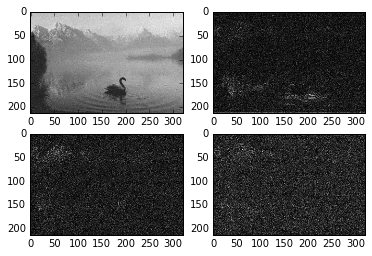

In [5]:
#Problem 3
swan = imread('swanlake_polluted.jpg', True)

lw = pywt.dwt2(swan, 'db4', mode='per')

plt.subplot(221)
plt.imshow(np.abs(lw[0]), cmap='gray')
plt.subplot(222)
plt.imshow(np.abs(lw[1][0]), cmap='gray')
plt.subplot(223)
plt.imshow(np.abs(lw[1][1]), cmap='gray')
plt.subplot(224)
plt.imshow(np.abs(lw[1][2]), cmap='gray')

plt.show()

In [6]:
#Problem 4
def clean_image(filename):
    
    image = imread(filename, True)
    wavelet = pywt.Wavelet('haar')
    WaveletCoeffs = pywt.wavedec2(image, wavelet)
    new_image = pywt.waverec2(WaveletCoeffs[:-1], wavelet)
    
    return new_image

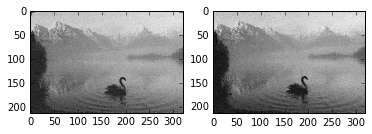

In [7]:
plt.subplot(121)
plt.imshow(np.abs(lw[0]), cmap='gray')
plt.subplot(122)
plt.imshow(clean_image('swanlake_polluted.jpg'), cmap= "gray")